In [49]:
#!/usr/bin/env python
# coding: utf-8
# In[1]:
#from SSIM_PIL import compare_ssim
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import random
import pandas as pd
import skimage
from skimage.io import imread
from sklearn.metrics import mean_squared_error
import os
iteration=20

In [50]:

# In[2]:
#def get_Noise(img,d): #getting salt and paper noise
# #return skimage.util.random_noise(img, mode='s&p', amount=d)
# paper=d
# salt=1-d
# row, col=img.shape
# g=np.matrix(img).reshape(row, col)
# for i in range(row):
# for j in range(col):
# ran=np.random.random()
# if ran<paper:
# g[i,j]=0
# elif ran>salt:
# g[i,j]=255
# else:
# g[i,j]=img[i,j]
# return g
# In[3]:
def get_Noise(image, prob):
    #'''
    #Add salt and pepper noise to image
    #prob: Probability of the noise
    #'''
    output = image.copy()
    if len(image.shape) == 2:
        black = 0
        white = 255            
    else:
        colorspace = image.shape[2]
        if colorspace == 3:  # RGB
            black = np.array([0, 0, 0], dtype='uint8')
            white = np.array([255, 255, 255], dtype='uint8')
        else:  # RGBA
            black = np.array([0, 0, 0, 255], dtype='uint8')
            white = np.array([255, 255, 255, 255], dtype='uint8')
    probs = np.random.random(output.shape[:2])
    output[probs < (prob / 2)] = black
    output[probs > 1 - (prob / 2)] = white
    return output

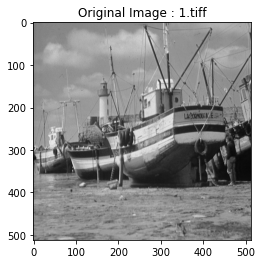

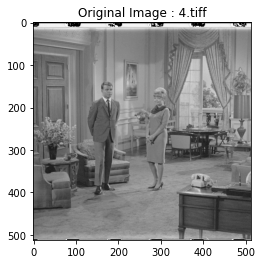

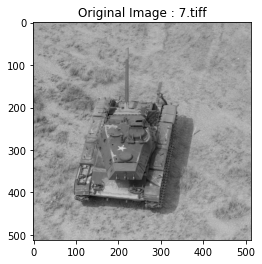

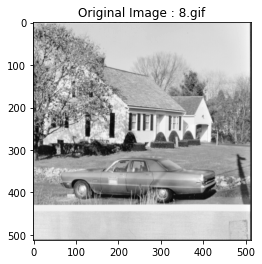

In [51]:
# In[4]:
path=r'C://Users//Biswarup Mistry//Desktop//Misc1//db//' #defining the image directory path
#path=r'C://Users//BRSC-13//Desktop//CMSM_2102279_(21-22)//ML_Projects//Misc1//db//' #defining the image directory path
dir_list = os.listdir(path)
for item in dir_list :
    k=str(path+str(item))
    img = imread(k)
    plt.title('Original Image : '+item)
    plt.imshow(img,cmap=plt.cm.gray)
    plt.show()



In [59]:
# In[5]:
def PSNRVsNoiseDensity(): #getting corresponding mse(s) for given noise density 'd'
    r=255.0
    dataframe = pd.DataFrame()
    for item in dir_list :
        k=str(path+str(item))
        img = imread(k)
        x=[]
        y=[]
        df=np.array([])
        i=iteration
        d=0.0
        while(i>0 and d<=1.0):
            noise_img=get_Noise(img,d) #getting noisy image
            mse=np.square(np.subtract(img,noise_img)).mean() #calculating MSE of Original image and Image with Noise
            psnr=10*np.log10(np.square(r)/mse) #getting the psnr of Original image and Noisy image
            x.append(d)
            y.append(psnr)
            df=np.append(df,psnr)
            d=d+0.05
            i=i-1
        dataframe[item] = df
    dataframe.to_csv('PSNRvsNoiseDensity.csv', index=False) #creating the PSNR valu csv file


In [60]:
# In[6]:
PSNRVsNoiseDensity() #creating the Mse(s) csv file


C:\Users\Biswarup Mistry\AppData\Local\Temp\ipykernel_7052\733362251.py:16: RuntimeWarning: divide by zero encountered in double_scalars
  psnr=10*np.log10(np.square(r)/mse) #getting the psnr of Original image and Noisy image
C:\Users\Biswarup Mistry\AppData\Local\Temp\ipykernel_7052\733362251.py:16: RuntimeWarning: divide by zero encountered in double_scalars
  psnr=10*np.log10(np.square(r)/mse) #getting the psnr of Original image and Noisy image
C:\Users\Biswarup Mistry\AppData\Local\Temp\ipykernel_7052\733362251.py:16: RuntimeWarning: divide by zero encountered in double_scalars
  psnr=10*np.log10(np.square(r)/mse) #getting the psnr of Original image and Noisy image
C:\Users\Biswarup Mistry\AppData\Local\Temp\ipykernel_7052\733362251.py:16: RuntimeWarning: divide by zero encountered in double_scalars
  psnr=10*np.log10(np.square(r)/mse) #getting the psnr of Original image and Noisy image


In [61]:
# In[7]:
data=pd.read_csv('PSNRvsNoiseDensity.csv')
data


,1.tiff,4.tiff,7.tiff,8.gif
0,inf,inf,inf,inf
1,40.747069,41.256304,41.199475,40.801193
2,37.802992,38.271473,38.258801,37.812133
3,36.023048,36.531236,36.489840,36.072239
4,34.798461,35.294495,35.191673,34.721910
5,33.867147,34.327537,34.238348,33.827493
6,33.042770,33.522012,33.422551,33.009215
7,32.371603,32.847063,32.797100,32.316628
8,31.784325,32.258941,32.224600,31.780268
9,31.270787,31.762186,31.693657,31.230850


In [62]:
# In[8]:
df=pd.DataFrame(data)
def combined(dir_list,iteration): #for combined graph ploting of PSNR vs Noise Density
    x=[]
    d=0.0
    i=iteration
    while i>0:
        x.append(d)
        d=d+0.05
        i=i-1
    plt.title('PSNR(s) vs Density')
    plt.xlabel('Noise density')
    plt.ylabel('PSNR')
    for item in dir_list:
        plt.scatter(x,df[item],marker='o')
        plt.plot(x,df[item])
    plt.axvline(0.5, color='k', linestyle='--') #defining the Thresold line at density 0.5
    plt.show()

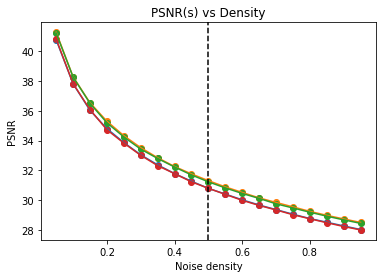

In [63]:
# In[9]:
combined(dir_list,iteration)
# In[10]:


In [64]:
x=np.array([])
x=np.append(x,df['1.tiff'])
print('x : ',x,'\n')
print('np.sum(x) : ',np.sum(x) )

x :  [        inf 40.74706949 37.80299237 36.02304791 34.79846104 33.86714678
 33.04277026 32.37160281 31.78432472 31.27078683 30.79517716 30.40857698
 30.02731028 29.67698857 29.3710664  29.06012906 28.77094411 28.52407926
 28.27629916 28.03607805] 

np.sum(x) :  inf
